In [14]:
import pandas as pd
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df=df.drop(df.columns[[1, 2, 3, 4, 5, 10, 11, 12]], axis=1)
df.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,226-31-3081,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,631-41-3108,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,123-19-1176,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,373-73-7910,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np
x=df.values[:,1:]
x=np.nan_to_num(x)
dataSet=StandardScaler().fit_transform(x)
dataSet

array([[ 0.71816014,  0.5099302 ,  0.91960685, ...,  0.        ,
         0.91960685,  1.23844341],
       [-1.52530319, -0.17453987, -0.98772956, ...,  0.        ,
        -0.98772956,  1.52952681],
       [-0.35278112,  0.5099302 ,  0.07144605, ...,  0.        ,
         0.07144605,  0.24875987],
       ...,
       [-0.89995809, -1.54348001, -1.17810859, ...,  0.        ,
        -1.17810859,  0.42340991],
       [ 0.38320778, -1.54348001, -1.03293176, ...,  0.        ,
        -1.03293176, -1.67239054],
       [ 1.23361671,  0.5099302 ,  1.32783657, ...,  0.        ,
         1.32783657, -0.21697356]])

In [17]:
from sklearn.cluster import KMeans
clusterNum=3
k_means=KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(x)
labels=k_means.labels_
print(labels)

[0 1 0 0 2 2 0 2 1 1 1 1 1 0 2 2 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 2 2 1 0 1 0
 0 0 1 1 1 0 2 1 0 0 1 1 2 2 1 1 1 1 2 1 2 2 1 1 0 0 1 0 1 1 2 2 1 2 2 1 0
 2 0 0 1 2 1 2 0 1 0 1 2 0 0 1 0 1 0 1 2 1 1 2 1 1 0 1 2 1 0 1 2 1 0 0 2 1
 0 0 0 2 1 1 1 1 1 2 0 2 0 0 2 1 0 0 2 0 2 1 0 0 0 1 1 0 2 2 2 2 1 0 0 0 0
 2 0 0 1 2 1 2 0 1 1 2 2 0 1 0 1 0 0 2 2 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1
 1 2 1 1 0 1 1 2 1 1 1 1 1 1 0 1 1 0 0 1 1 2 0 1 2 1 2 0 1 1 1 1 0 2 1 0 0
 1 1 1 1 2 1 0 0 1 1 2 0 0 1 1 1 1 1 1 1 1 1 2 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 0 2 1 1 1 1 2 1 2 0 0 0 1 1 1 2 0 1 0 2 0 2 1 1 2 1 0 1 1 0 2 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 2 1 1 0 1 1 1 2 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 2 0 1 0 1 0 0 0 1 2 1 2 1 1 2 0 0 1 1 0 0 2 1 1 2 2 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 2 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 2 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 2 1 1 0 0 1 0 2 1 1 1 2 1 2 0 1 1 0 1 2 2 1
 1 1 0 1 1 1 0 1 0 1 1 1 2 2 0 1 1 2 0 1 0 0 0 1 1 1 0 1 0 2 0 1 1 0 0 1 0
 0 1 2 0 1 0 1 1 2 1 1 1 

In [27]:
df["Clus_km"]=labels
df.head(953)

,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Clus_km
0,750-67-8428,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0
1,226-31-3081,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,1
2,631-41-3108,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0
3,123-19-1176,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0
4,373-73-7910,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...
948,373-88-1424,35.81,5,8.9525,188.0025,179.05,4.761905,8.9525,7.9,1
949,365-16-4334,26.43,8,10.5720,222.0120,211.44,4.761905,10.5720,8.9,1
950,503-21-4385,39.91,3,5.9865,125.7165,119.73,4.761905,5.9865,9.3,1
951,305-89-2768,21.90,3,3.2850,68.9850,65.70,4.761905,3.2850,4.7,1


In [15]:
df.groupby('Clus_km').mean()

,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Clus_km,,,,,,,
0,8.686391,36.174314,759.660586,723.486272,4.761905,36.174314,6.683432
1,3.843931,6.315656,132.628777,126.313121,4.761905,6.315656,7.029094
2,6.560897,19.192579,403.044149,383.851571,4.761905,19.192579,7.035577


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

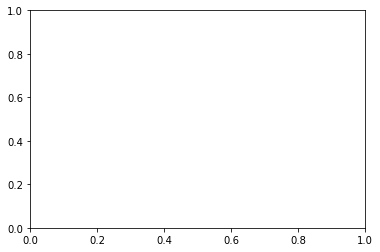

In [18]:
import matplotlib.pyplot as plt
area=np.pi*(x[:, 1])**2
plt.scatter(x[:, 0], x[:, 3], s=area, c=labels.astype(np.float), alpha=0.3)
plt.xlabel('Tax 5%', fontsize=18)
plt.ylabel('gross margin percentage', fontsize=16)
plt.show()